In [7]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

calendar = pd.read_csv('data/calendar.csv')
listings = pd.read_csv('./data/listings.csv')
reviews = pd.read_csv('./data/reviews.csv')

## Understanding data

In [21]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [31]:
calendar['available'].value_counts()

f    665853
t    643037
Name: available, dtype: int64

price is Null for some entries

In [43]:
print("percent of nan price:", calendar[calendar['price'].isnull()]['price'].shape[0]/calendar.shape[0])

percent of nan price: 0.5087157820748879


In [44]:
print("percent of nan price for available listings", calendar[calendar['available']=='t'][calendar['price'].isnull()]['price'].shape[0]/calendar.shape[0])

percent of nan price for available listings 0.0


C:\Users\santo\Miniconda3\envs\conda-env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [45]:
print("percent of nan price for unavailable listings", calendar[calendar['available']=='f'][calendar['price'].isnull()]['price'].shape[0]/calendar.shape[0])

percent of nan price for unavailable listings 0.5087157820748879


C:\Users\santo\Miniconda3\envs\conda-env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [24]:
calendar.shape

(1308890, 4)

In [49]:
print(f"listing is available from {calendar.date.min()} to {calendar.date.max()}")

listing is available from 2016-09-06 to 2017-09-05


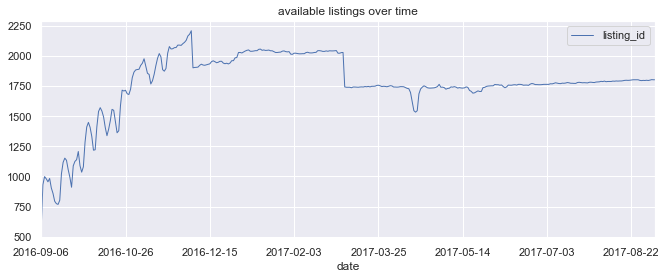

In [54]:
calendar[calendar['available']=='t'].groupby('date').agg({'listing_id':'count'}).plot(linewidth=1, title='available listings over time');

Calendar contains 4 columns and 1308890 listings
columns include 
* listing_id : id linked to the property/listing
* date : the date 
* available : takes value 'f' or 't' denoting false or true respectively.
* price : 643037 not null entries, price is available for all available listings and 50.87% available for unavailable listings

In [57]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [17]:
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 95, dtype: object

In [18]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...
